This script plots up meteorological weather station data from the August 10th Derecho event that impacted the Midwest. This is the programming 2nd programming assignment for **Atmos 5340**. 



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime


In [2]:
#Lets read in our meteorological data
stat1 = pd.read_csv('./class_files/pHW2_IA061.csv',sep=',',skiprows=6,index_col=1,parse_dates=True)

#Check our data
print(stat1)

                          Station_ID  air_temp_[C]  relative_humidity_[%]  \
Date_Time                                                                   
2020-08-09 12:00:00+00:00      IA061         22.01                   95.0   
2020-08-09 12:10:00+00:00      IA061         22.01                   95.0   
2020-08-09 12:20:00+00:00      IA061         21.91                   95.0   
2020-08-09 12:30:00+00:00      IA061         22.01                   95.0   
2020-08-09 12:40:00+00:00      IA061         22.11                   95.0   
...                              ...           ...                    ...   
2020-08-11 11:20:00+00:00      IA061         17.41                   95.0   
2020-08-11 11:30:00+00:00      IA061         17.51                   95.0   
2020-08-11 11:40:00+00:00      IA061         17.61                   95.0   
2020-08-11 11:50:00+00:00      IA061         17.81                   95.0   
2020-08-11 12:00:00+00:00      IA061         17.91                   95.0   

In [3]:
#And lets convert our time from UTC to Central 
stat1.index = stat1.index.tz_convert('US/Central')

In [4]:
#print our times again...
print(stat1)

                          Station_ID  air_temp_[C]  relative_humidity_[%]  \
Date_Time                                                                   
2020-08-09 07:00:00-05:00      IA061         22.01                   95.0   
2020-08-09 07:10:00-05:00      IA061         22.01                   95.0   
2020-08-09 07:20:00-05:00      IA061         21.91                   95.0   
2020-08-09 07:30:00-05:00      IA061         22.01                   95.0   
2020-08-09 07:40:00-05:00      IA061         22.11                   95.0   
...                              ...           ...                    ...   
2020-08-11 06:20:00-05:00      IA061         17.41                   95.0   
2020-08-11 06:30:00-05:00      IA061         17.51                   95.0   
2020-08-11 06:40:00-05:00      IA061         17.61                   95.0   
2020-08-11 06:50:00-05:00      IA061         17.81                   95.0   
2020-08-11 07:00:00-05:00      IA061         17.91                   95.0   

In [5]:
#Lets convert our variables to English units from Metric for each station
stat1['wind_speed_[m/s]'] = stat1['wind_speed_[m/s]']*2.23694     #m/s to mph
stat1['wind_gust_[m/s]'] = stat1['wind_gust_[m/s]']*2.23694       #m/s to mph
stat1['air_temp_[C]'] = (stat1['air_temp_[C]']*(9/5)) + 32        #C to F


In [6]:
#Determine time and speed of maximum wind gust
max_gust = str(round(np.max(stat1['wind_gust_[m/s]']),1))
max_gust_t = str(stat1.index[np.argmax(stat1['wind_gust_[m/s]'])])

print(max_gust)
print(max_gust_t)


85.1
2020-08-10 13:50:00-05:00


In [7]:
#Lets subset data for day of derecho
stat1 = stat1[(stat1.index >= '2020-08-10 00:00:00') & (stat1.index < '2020-08-11 00:00:00')]


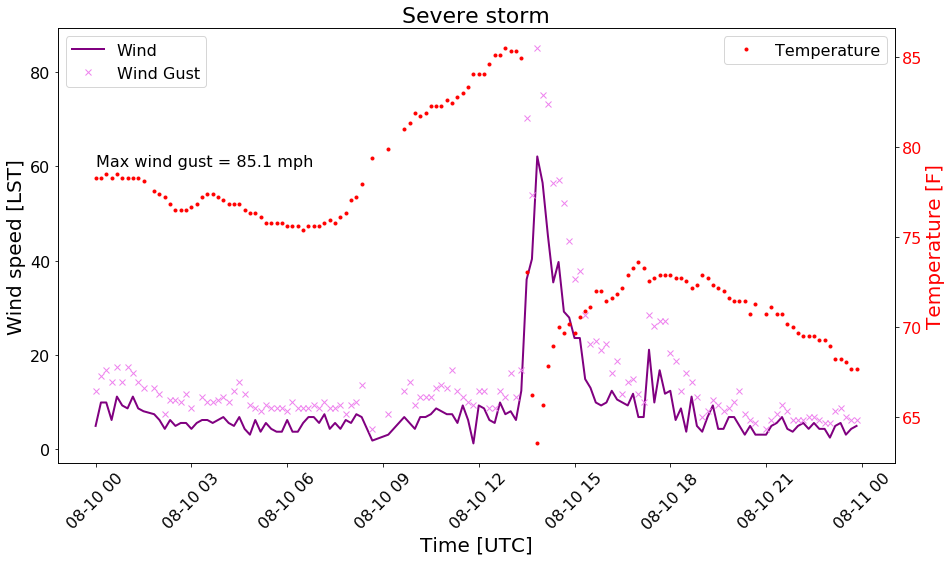

In [8]:
#Matplot lib bad about honoring time zone, need to manually change it with 
#this command. Dumb.
plt.rcParams['timezone'] = 'US/Central'

#Lots plot our data up on a double axis
fig, ax1 = plt.subplots(figsize=(15,8))

ax1.plot(stat1['wind_speed_[m/s]'], color="purple", linestyle = "-",linewidth=2,label="Wind")
ax1.plot(stat1['wind_gust_[m/s]'], color="violet", marker="x",linewidth=0,label="Wind Gust")
ax1.tick_params(axis='x',rotation=45,labelsize=16)
ax1.tick_params(axis='y',labelsize=16)
ax1.set_xlabel('Time [UTC]',fontsize=20)
ax1.set_ylabel('Wind speed [LST]',fontsize=20) 
ax1.set_title('Severe storm',fontsize=22)
ax1.legend(loc="upper left",fontsize=16)
ax1.text(stat1.index[0],60, 'Max wind gust = '+max_gust+' mph', fontsize=16)
#ax1.xaxis_date('US/Central')

ax2 = ax1.twinx()
ax2.plot(stat1['air_temp_[C]'], color="red", marker=".",linewidth=0,label="Temperature")
ax2.set_ylabel('Temperature [F]',fontsize=20,color="red")
ax2.tick_params(axis='y', labelcolor="red",labelsize=16)
ax2.legend(loc="upper right",fontsize=16)
